In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark
import pyspark.pandas as ps
import pyspark.sql.functions as SparkSession
from pyspark.sql.functions import min, max, desc, avg, round
import functools

In [3]:
spark = pyspark.sql.SparkSession.builder.getOrCreate()

your 131072x1 screen size is bogus. expect trouble
23/05/17 16:26:15 WARN Utils: Your hostname, DESKTOP-685S3TT resolves to a loopback address: 127.0.1.1; using 172.20.241.155 instead (on interface eth0)
23/05/17 16:26:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/17 16:26:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
mpg_db = sns.load_dataset('mpg')
mpg_db.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
mpg_df = spark.createDataFrame(mpg_db)
mpg_df.show()

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|                name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|     130.0|  3504|        12.0|        70|   usa|chevrolet chevell...|
|15.0|        8|       350.0|     165.0|  3693|        11.5|        70|   usa|   buick skylark 320|
|18.0|        8|       318.0|     150.0|  3436|        11.0|        70|   usa|  plymouth satellite|
|16.0|        8|       304.0|     150.0|  3433|        12.0|        70|   usa|       amc rebel sst|
|17.0|        8|       302.0|     140.0|  3449|        10.5|        70|   usa|         ford torino|
|15.0|        8|       429.0|     198.0|  4341|        10.0|        70|   usa|    ford galaxie 500|
|14.0|        8|       454.0|     220.0|  4354|         9.0|        70|   usa|    chevrolet impala|


In [7]:
# Question 1

# # Pandas
# highest_mpg = mpg_db.max()
# lowest_mpg = mpg_db.min()
# high_low = [highest_mpg, lowest_mpg]

# high_low

# # PySpark
max_mpg_select = mpg_df.select(max(mpg_df.mpg).alias('Highest_MPG')).show()
max_mpg_filter = mpg_df.filter(mpg_df.mpg > 46).show()

min_mpg_select = mpg_df.select(min(mpg_df.mpg).alias('Lowest_MPG')).show()
min_mpg_filter = mpg_df.filter(mpg_df.mpg <= 9).show()


+-----------+
|Highest_MPG|
+-----------+
|       46.6|
+-----------+

+----+---------+------------+----------+------+------------+----------+------+---------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|     name|
+----+---------+------------+----------+------+------------+----------+------+---------+
|46.6|        4|        86.0|      65.0|  2110|        17.9|        80| japan|mazda glc|
+----+---------+------------+----------+------+------------+----------+------+---------+

+----------+
|Lowest_MPG|
+----------+
|       9.0|
+----------+

+---+---------+------------+----------+------+------------+----------+------+--------+
|mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|    name|
+---+---------+------------+----------+------+------------+----------+------+--------+
|9.0|        8|       304.0|     193.0|  4732|        18.5|        70|   usa|hi 1200d|
+---+---------+------------+----------+------+------------+----------

In [8]:
# Question 2
mpg_db['model_year'].unique()

# # Pandas
# car70s = mpg_db[mpg_db['model_year'] < 80]
# car70s.max()
# car70s.min()
# car70sMinMax = [car70s.min(), car70s.max()]
# car70sMinMax

# car80s = mpg_db[mpg_db['model_year'] >= 80]
# car80s.max()
# car80s.min()
# car80sMinMax = [car80s.min(), car80s.max()]

# concat70s = pd.concat(car70sMinMax)
# concat80s = pd.concat(car80sMinMax)

# pd.concat([concat70s, concat80s])

# PySpark
car70s = mpg_df.filter(mpg_df.model_year < 80)
car70sMaxMPG = car70s.groupBy('mpg').max().limit(3)
car70sMaxMPG.show()


car70sMinMPG = car70s.sort('mpg').limit(3)
car70sMinMPG.show()

car80s = mpg_df.filter(mpg_df.model_year >= 80)
car80sMaxMPG = car80s.groupBy('mpg').max().limit(3)
car80sMaxMPG.show()

car80sMinMPG = car80s.sort('mpg').limit(3)
car80sMinMPG.show()

+----+--------+--------------+-----------------+---------------+-----------+-----------------+---------------+
| mpg|max(mpg)|max(cylinders)|max(displacement)|max(horsepower)|max(weight)|max(acceleration)|max(model_year)|
+----+--------+--------------+-----------------+---------------+-----------+-----------------+---------------+
|35.0|    35.0|             4|             72.0|           69.0|       1613|             18.0|             71|
|18.0|    18.0|             8|            318.0|          150.0|       3785|             21.0|             76|
|25.0|    25.0|             4|            140.0|            NaN|       2672|             19.0|             76|
+----+--------+--------------+-----------------+---------------+-----------+-----------------+---------------+



+----+---------+------------+----------+------+------------+----------+------+---------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|     name|
+----+---------+------------+----------+------+------------+----------+------+---------+
| 9.0|        8|       304.0|     193.0|  4732|        18.5|        70|   usa| hi 1200d|
|10.0|        8|       360.0|     215.0|  4615|        14.0|        70|   usa|ford f250|
|10.0|        8|       307.0|     200.0|  4376|        15.0|        70|   usa|chevy c20|
+----+---------+------------+----------+------+------------+----------+------+---------+

+----+--------+--------------+-----------------+---------------+-----------+-----------------+---------------+
| mpg|max(mpg)|max(cylinders)|max(displacement)|max(horsepower)|max(weight)|max(acceleration)|max(model_year)|
+----+--------+--------------+-----------------+---------------+-----------+-----------------+---------------+
|32.3|    32.3|             4|             

In [63]:
mpg_df.select(mpg_df.origin).distinct().show()

# avg_weight = mpg_df.select(avg(mpg_df.weight)).show()

# japan = mpg_df.filter(mpg_df.origin == 'japan').show()
# europe = mpg_df.filter(mpg_df.origin == 'europe').show()
# usa = mpg_df.filter(mpg_df.origin == 'usa').show()

mpg_df.groupby('origin').avg('weight').show()

+------+
|origin|
+------+
| japan|
|europe|
|   usa|
+------+

+------+------------------+
|origin|       avg(weight)|
+------+------------------+
| japan| 2221.227848101266|
|europe|            2423.3|
|   usa|3361.9317269076305|
+------+------------------+



In [66]:
mpg_df.select(mpg_df.cylinders).distinct().show()

mpg_df.groupby('cylinders').avg('mpg').show()

+---------+
|cylinders|
+---------+
|        6|
|        3|
|        8|
|        4|
|        5|
+---------+

+---------+------------------+
|cylinders|          avg(mpg)|
+---------+------------------+
|        6|19.985714285714288|
|        3|             20.55|
|        8|14.963106796116506|
|        4| 29.28676470588235|
|        5|27.366666666666664|
+---------+------------------+



In [82]:
mpg_df.groupby('origin').avg('mpg').show()
mpg_df.groupby('model_year').avg('mpg').show()

+------+------------------+
|origin|          avg(mpg)|
+------+------------------+
| japan|30.450632911392404|
|europe|27.891428571428573|
|   usa|20.083534136546188|
+------+------------------+

+----------+------------------+
|model_year|          avg(mpg)|
+----------+------------------+
|        71|             21.25|
|        72|18.714285714285715|
|        73|              17.1|
|        70|17.689655172413794|
|        74|22.703703703703702|
|        76|21.573529411764707|
|        75|20.266666666666666|
|        77|            23.375|
|        79|25.093103448275862|
|        78|24.061111111111114|
|        80|33.696551724137926|
|        81| 30.33448275862069|
|        82| 31.70967741935484|
+----------+------------------+



 What is the correlation between mpg and release year?

 MPG and release year appear to have a positive correlation as displayed by the scatterplot below.

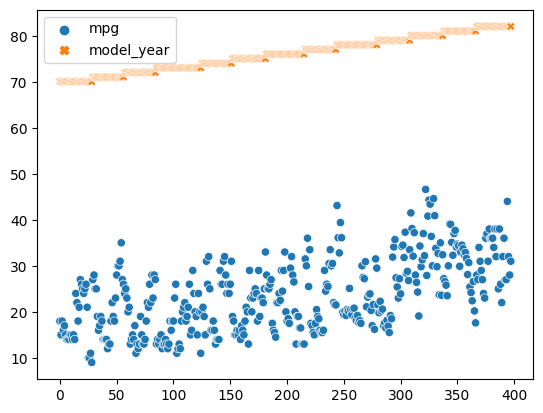

In [135]:
mpg = mpg_db['mpg']
model_year = mpg_db['model_year']
mpg_my = pd.concat([mpg, model_year], axis=1)

sns.scatterplot(data=mpg_my)
plt.show()

 What is the relationship between cylinder and horsepower?

As shown in the boxplot below, horsepower appears to increase as the amount of cylinders increase with the exception of the 3 cylinder vehicles.

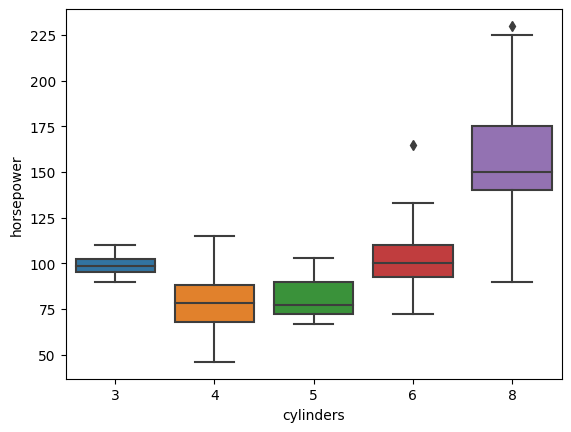

In [155]:
cylinders = mpg_db['cylinders']
horsepower = mpg_db['horsepower']
cyl_hp = pd.concat([cylinders, horsepower], axis=1)

sns.boxplot(data=cyl_hp, x=cylinders, y=horsepower)
plt.show()

What is the relationship between cylinder and acceleration?

The acceleration appears to decrease as the number of cylinders increase as exhibited on the regplot below.

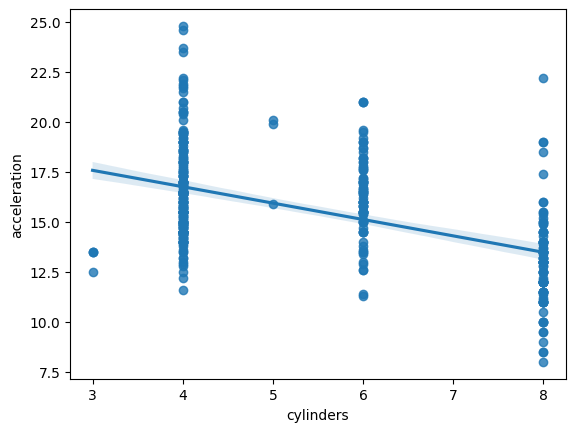

In [163]:
cylinders = mpg_db['cylinders']
acceleration = mpg_db['acceleration']
cyl_acc = pd.concat([cylinders, acceleration], axis=1)

sns.regplot(data=cyl_acc, x=cylinders, y=acceleration)
# sns.heatmap(data=cyl_acc)
plt.show()

 What other factors correlate with acceleration?

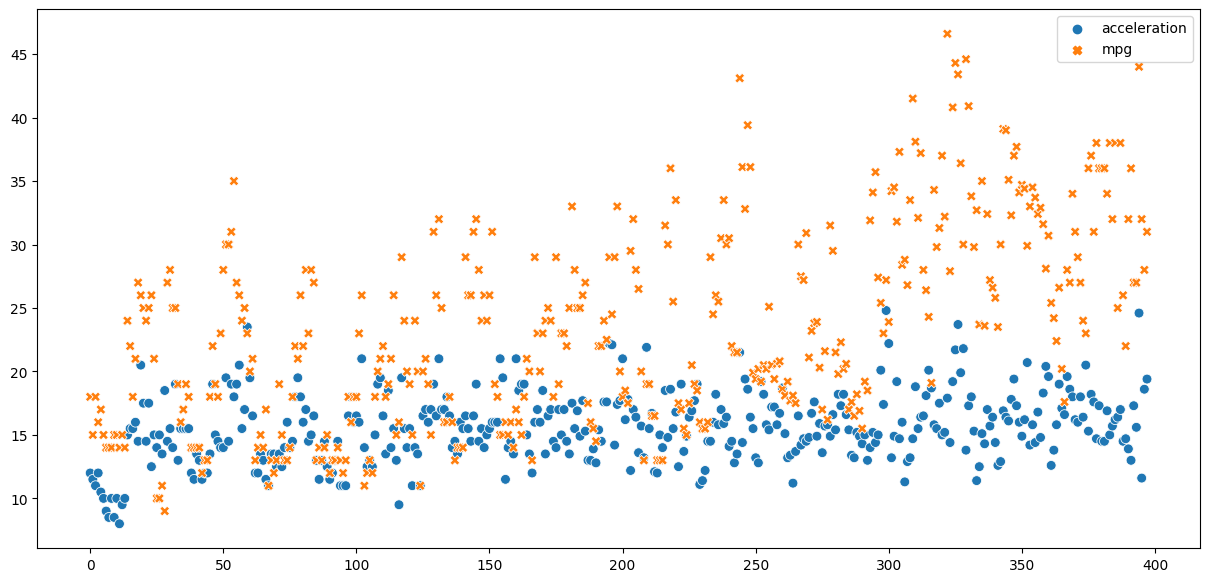

In [195]:
acc = mpg_db['acceleration']
mpg = mpg_db['mpg']
acc_mpg = pd.concat([acc, mpg], axis=1)
fig, ax = plt.subplots(figsize=(15, 7))
sns.scatterplot(data=acc_mpg, s=50)
plt.show()

Bonus: Find the average mpg per manufacturer

In [196]:
mpg_df.groupby('name').avg('mpg').show()

+--------------------+--------+
|                name|avg(mpg)|
+--------------------+--------+
|         audi 100 ls|    24.0|
|    chevrolet malibu|   16.75|
|buick estate wago...|   15.45|
|         amc matador|    15.7|
|ford gran torino ...|    13.5|
|plymouth satellit...|    16.0|
|           fiat 124b|    30.0|
|toyota corona har...|    24.0|
|            bmw 2002|    26.0|
|            hi 1200d|     9.0|
|    amc matador (sw)|    14.5|
| chevrolet vega 2300|    28.0|
|plymouth fury gra...|    14.0|
|toyouta corona ma...|    23.0|
|          dodge d200|    11.0|
|  plymouth 'cuda 340|    14.0|
|  mercury capri 2000|    23.0|
|       ford maverick|    19.8|
|       amc rebel sst|    16.0|
|amc ambassador br...|    13.0|
+--------------------+--------+
only showing top 20 rows



Bonus: Find the heaviest and lightest cars per manufacturer

In [290]:
min_name_weight = mpg_df.groupby('name').min('weight').show()
max_name_weight = mpg_df.groupby('name').max('weight').show()

combined = [min_name_weight, max_name_weight]
combined

+--------------------+-----------+
|                name|min(weight)|
+--------------------+-----------+
|         audi 100 ls|       2430|
|    chevrolet malibu|       3155|
|buick estate wago...|       3086|
|         amc matador|       3288|
|ford gran torino ...|       4294|
|plymouth satellit...|       3439|
|           fiat 124b|       2065|
|toyota corona har...|       2278|
|            bmw 2002|       2234|
|            hi 1200d|       4732|
|    amc matador (sw)|       3892|
| chevrolet vega 2300|       2264|
|plymouth fury gra...|       4237|
|toyouta corona ma...|       2506|
|          dodge d200|       4382|
|  plymouth 'cuda 340|       3609|
|  mercury capri 2000|       2220|
|       ford maverick|       2587|
|       amc rebel sst|       3433|
|amc ambassador br...|       3821|
+--------------------+-----------+
only showing top 20 rows



+--------------------+-----------+
|                name|max(weight)|
+--------------------+-----------+
|         audi 100 ls|       2430|
|    chevrolet malibu|       3988|
|buick estate wago...|       4360|
|         amc matador|       3962|
|ford gran torino ...|       4638|
|plymouth satellit...|       3439|
|           fiat 124b|       2065|
|toyota corona har...|       2278|
|            bmw 2002|       2234|
|            hi 1200d|       4732|
|    amc matador (sw)|       4257|
| chevrolet vega 2300|       2264|
|plymouth fury gra...|       4237|
|toyouta corona ma...|       2506|
|          dodge d200|       4382|
|  plymouth 'cuda 340|       3609|
|  mercury capri 2000|       2220|
|       ford maverick|       3158|
|       amc rebel sst|       3433|
|amc ambassador br...|       3821|
+--------------------+-----------+
only showing top 20 rows



[None, None]